 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [182]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [165]:
whale_returns_path= ('Resources/whale_returns.csv')

In [166]:
whale_returns_df= pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [167]:
# Reading whale returns
whale_returns_df=whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [168]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [169]:
# Drop nulls
whale_returns_df= whale_returns_df.dropna()
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [170]:
# Reading algorithmic returns
algo_returns_path=('Resources/algo_returns.csv')
algo_returns_df= pd.read_csv(algo_returns_path, index_col='Date', parse_dates= True, infer_datetime_format= True)
algo_returns_df=algo_returns_df.sort_index()

In [171]:
# Count nulls
algo_returns_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [172]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [196]:
# Reading S&P TSX 60 Closing Prices
tsx60_returns_path=('Resources/sp_tsx_history.csv')
tsx60_returns= pd.read_csv(tsx60_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsx60_returns=tsx60_returns.sort_index()

In [197]:
# Check Data Types
tsx60_returns.dtypes
tsx60_returns.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [198]:
# Fix Data Types
tsx60_returns["Close"] = tsx60_returns["Close"].str.replace("$", "")
tsx60_returns["Close"] = tsx60_returns["Close"].str.replace(",", "")
tsx60_returns["Close"] = tsx60_returns["Close"].astype("float")
tsx60_returns.dtypes

C:\Users\resup\AppData\Local\Temp\ipykernel_23768\2128603834.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx60_returns["Close"] = tsx60_returns["Close"].str.replace("$", "")


Close    float64
dtype: object

In [199]:
# Calculate Daily Returns
tsx60_returns_df= tsx60_returns.pct_change()
tsx60_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [200]:
# Drop nulls
tsx60_returns_df.isnull().sum()
tsx60_returns_df= tsx60_returns_df.dropna()

In [201]:
# Rename `Close` Column to be specific to this portfolio.
tsx60_returns_df=tsx60_returns_df.rename(columns={'Close':'Tsx60'})
tsx60_returns_df.head()

,Tsx60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [202]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_portfolios = pd.concat([whale_returns_df, algo_returns_df, tsx60_returns_df], axis='columns', join='inner')
combined_portfolios.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily returns of all portfolios'}, xlabel='Date'>

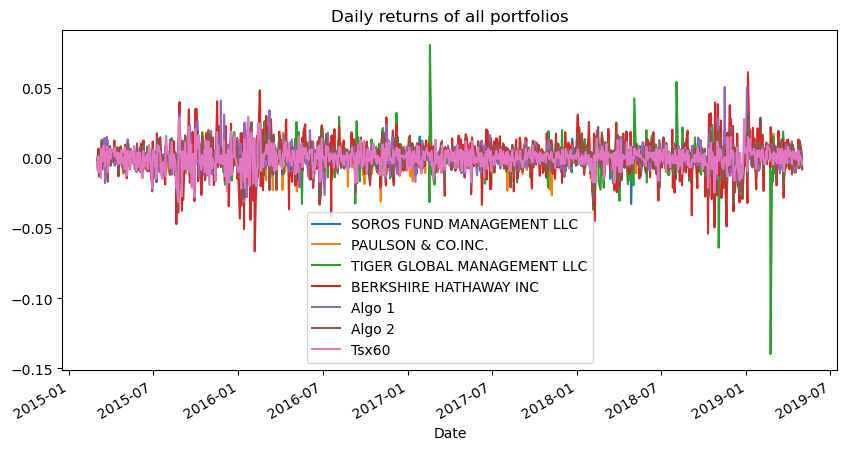

In [203]:
# Plot daily returns of all portfolios
combined_portfolios.plot(title='Daily returns of all portfolios', figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot: title={'center': 'Cumulative returns of all portfolios'}, xlabel='Date'>

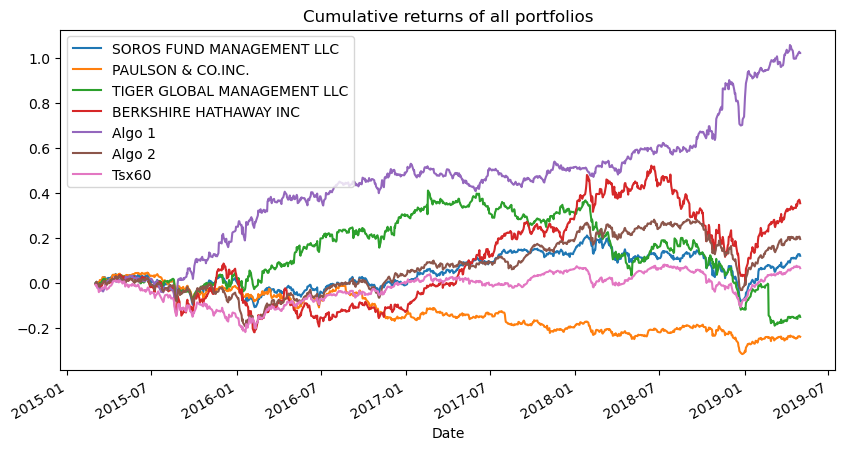

In [218]:
# Calculate cumulative returns of all portfolios
cumulative_returns= (1+ combined_portfolios).cumprod()-1

# Plot cumulative returns
cumulative_returns.plot(title='Cumulative returns of all portfolios', figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Calculate Standard Deviations

In [530]:
# Calculate the daily standard deviations of all portfolios
combined_portfolios_std = combined_portfolios.std()

combined_portfolios_std= combined_portfolios_std.sort_values()
combined_portfolios_std


PAULSON & CO.INC.              0.006982
Tsx60                          0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [565]:
# Calculate the annualized standard deviation (252 trading days)
annual_combined_portfolios_std = combined_portfolios_std * np.sqrt(252)
annual_combined_portfolios_std

PAULSON & CO.INC.              0.110841
Tsx60                          0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [566]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_tsx60 = tsx60_returns_df.std()
daily_std_tsx60.head()
# Determine which portfolios are riskier than the S&P TSX 60


Tsx60    0.006637
dtype: float64

### Create a box plot for each portfolio


<AxesSubplot: title={'center': 'Boxplot for each portfolios in the combined portfolios'}>

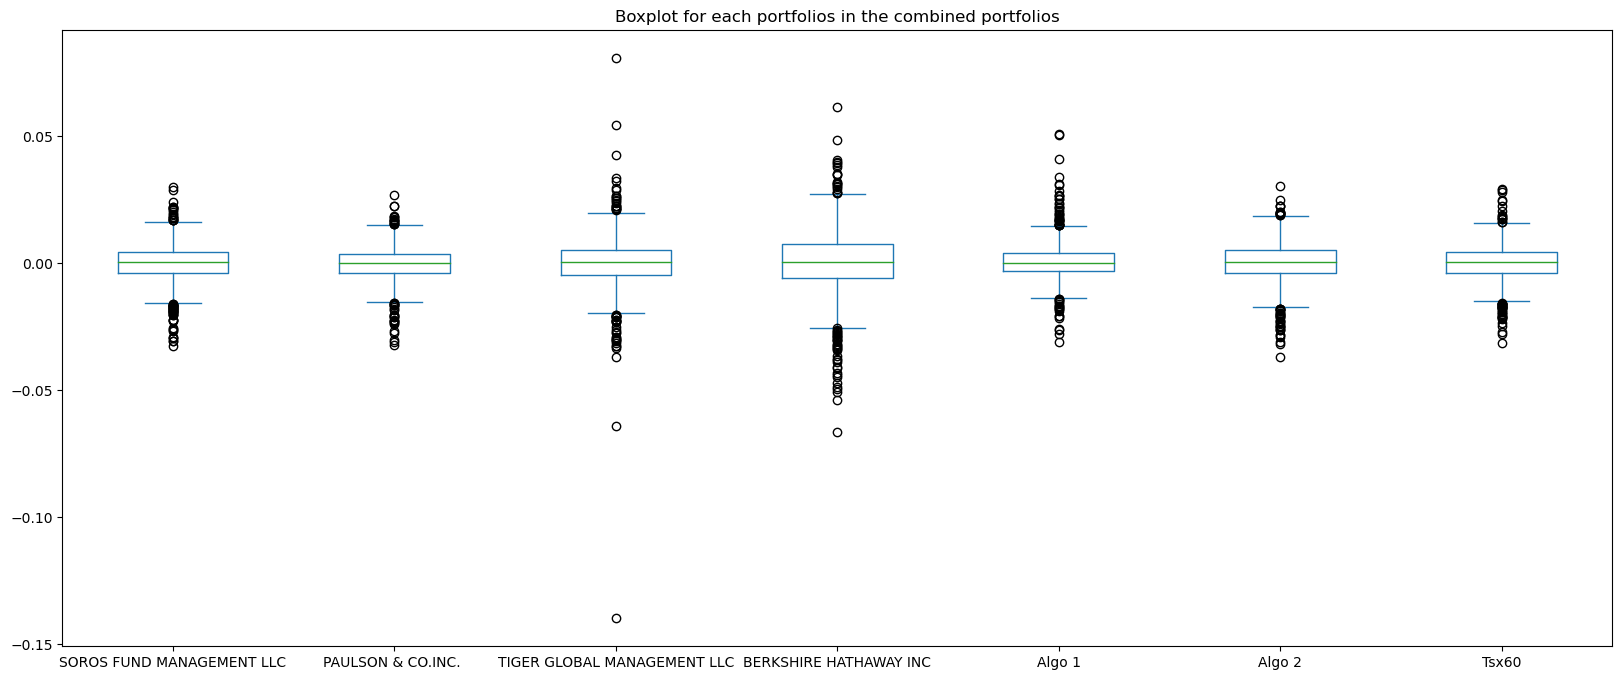

In [567]:
# Box plot to visually show risk
combined_portfolios.plot.box(title='Boxplot for each portfolios in the combined portfolios', figsize=(20,8))

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: title={'center': 'Rolling standard deviation 21 day window'}, xlabel='Date'>

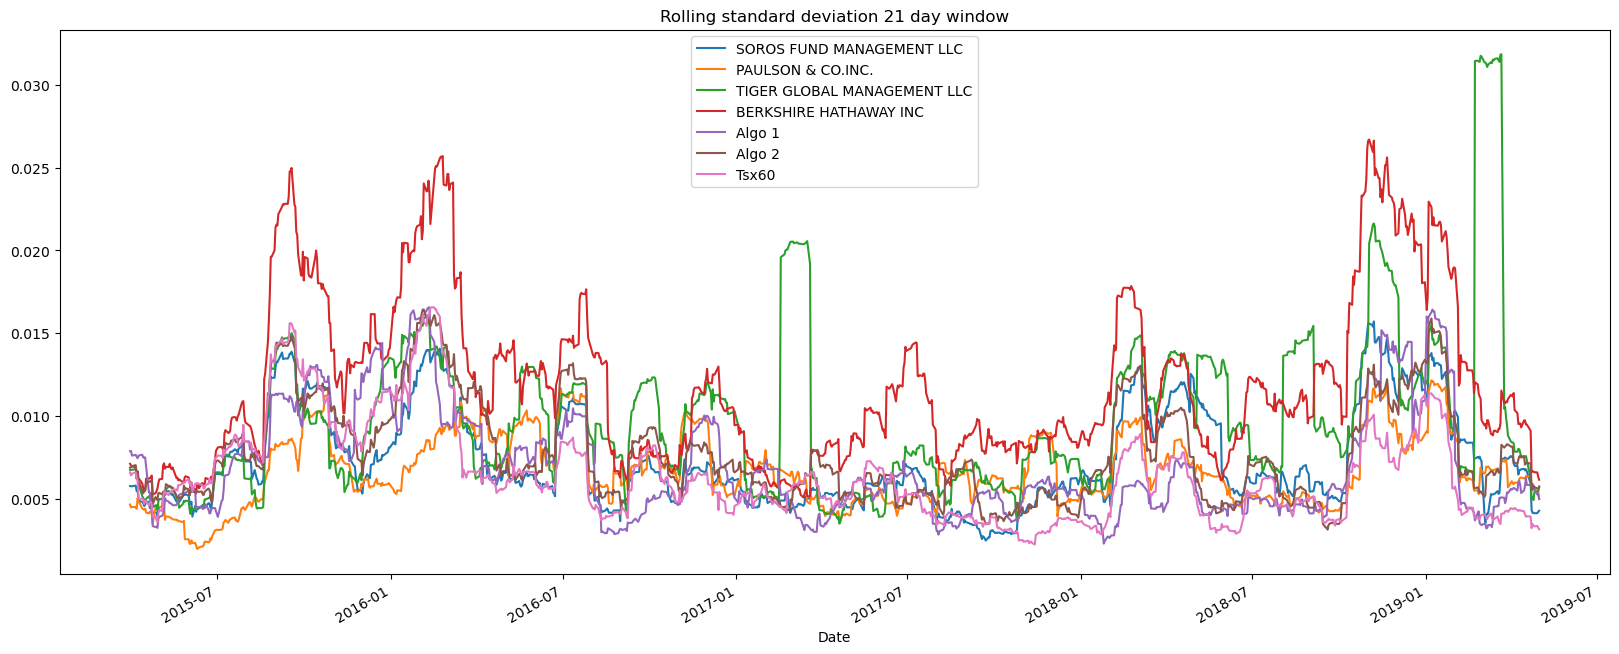

In [568]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_portfolios.rolling(window=21).std().plot(title='Rolling standard deviation 21 day window', figsize=(20,8))

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [536]:
# Calculate the correlation
correlation = combined_portfolios.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Tsx60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot: >

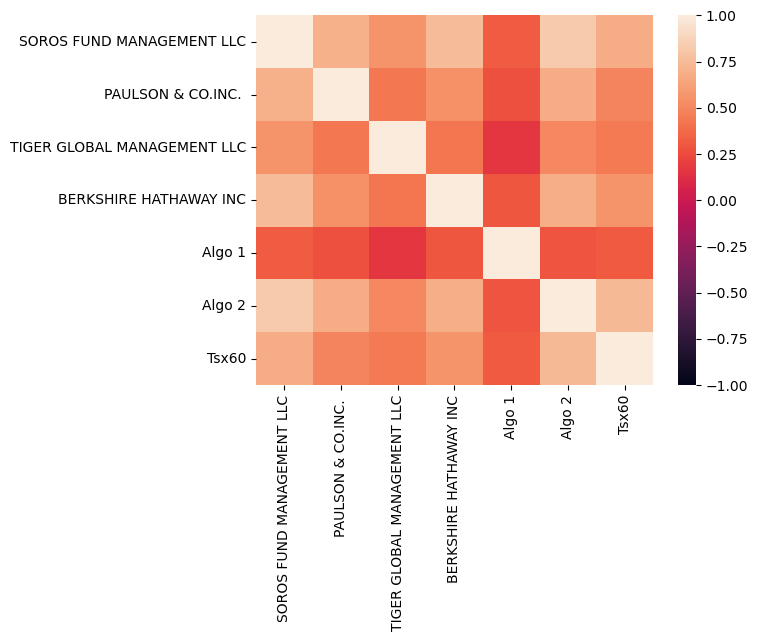

In [537]:
import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

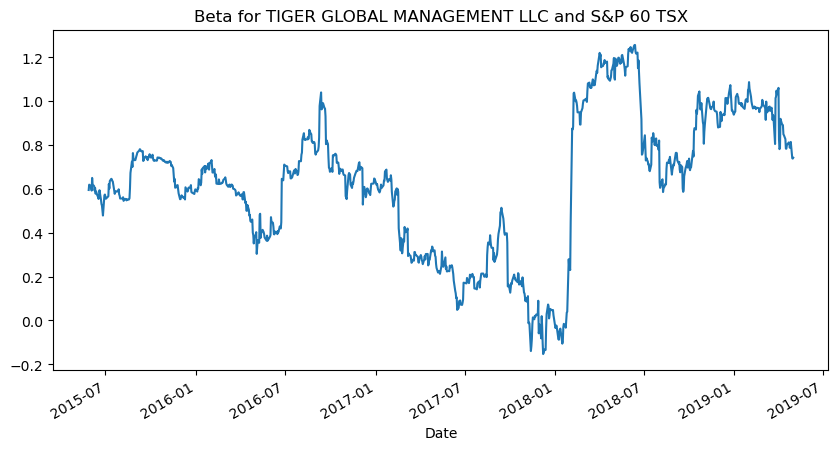

In [538]:
# Calculate covariance of a single portfolio

#chosen portfolio = 'TIGER GLOBAL MANAGEMENT LLC'

rolling_tiger_covariance = combined_portfolios['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_portfolios['Tsx60'])

# Calculate variance of S&P 60 TSX

rolling_variance1 = combined_portfolios['Tsx60'].rolling(window=60).var()

# Computing beta
rolling_tiger_beta = rolling_tiger_covariance / rolling_variance1

# Plot the beta value

ax= rolling_tiger_beta.plot(title='Beta for TIGER GLOBAL MANAGEMENT LLC and S&P 60 TSX', figsize=(10,5))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

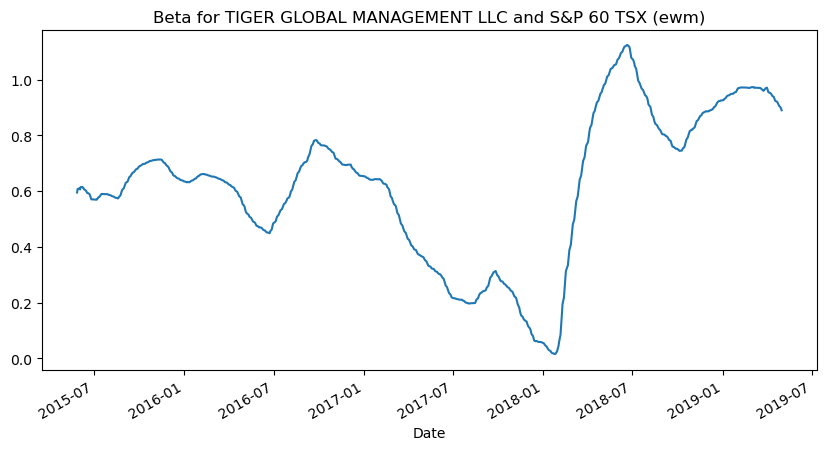

In [539]:
# Use `ewm` to calculate the rolling window

tiger_beta_ewm = rolling_tiger_beta.ewm(halflife=21).mean()

# Plot the beta value
ax = tiger_beta_ewm.plot(title='Beta for TIGER GLOBAL MANAGEMENT LLC and S&P 60 TSX (ewm)', figsize=(10,5))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [540]:
# Annualized Sharpe Ratios

#combined_portfolios= daily returns of all porfolios provided
#portfolios_std= cambined_portfolios.std() 

sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios_std * np.sqrt(252))
sharpe_ratios= sharpe_ratios.sort_values()

sharpe_ratios


PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
Tsx60                          0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

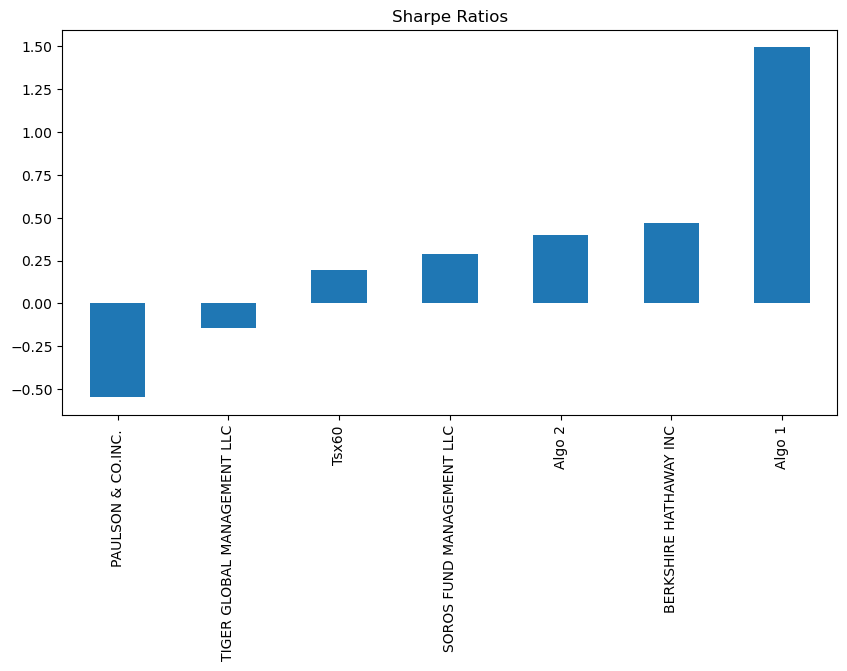

In [541]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title="Sharpe Ratios", figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [542]:
# Reading data from 1st stock

#ticker: MSTR: 'Microstrategy'

microstrategy_path = ('Resources/microstrategy.csv')
microstrategy_df = pd.read_csv(microstrategy_path, parse_dates=['Instructions\nEnter stock symbol in cell B4'])
microstrategy_df = microstrategy_df.rename(columns={'Instructions\nEnter stock symbol in cell B4': 'Date', 'Unnamed: 2': 'MSTR'})
microstrategy_df = microstrategy_df.set_index('Date')
microstrategy_df = microstrategy_df.drop(microstrategy_df.index[:26])
microstrategy_df = microstrategy_df.drop('Unnamed: 0', axis=1)
microstrategy_df.index = pd.to_datetime(microstrategy_df.index, infer_datetime_format=True)
microstrategy_df.sort_index()
microstrategy_df=microstrategy_df.astype(float)
microstrategy_df.head()

#I decided to give the google sheet finance tracker a try and use my own stocks.I wanted to practice the cleaning of data when downloading a csv file.
#I could have probably followed a simpler way to clean the data, such as deletting columns in the google sheets themselves, but Iam glad I didn't.
#This gave me more practice to use all the function, we've seen so far to work with data frames. It was long, but I feel acomplished I got the practice.





,MSTR
Date,
2018-01-02,131.80
2018-01-03,132.38
2018-01-04,135.06
2018-01-05,135.01
2018-01-08,136.61


In [543]:
# Reading data from 2nd stock

#ticker: MARA: 'Marathon Digital Holdings Incorporated'

mara_path = ('Resources/mara.csv')
mara_df = pd.read_csv(mara_path, parse_dates=['Instructions\nEnter stock symbol in cell B4'])
mara_df = mara_df.rename(columns={'Instructions\nEnter stock symbol in cell B4': 'Date', 'Unnamed: 5': 'MARA'})
mara_df = mara_df.set_index('Date')
mara_df = mara_df.drop(mara_df.index[:26])
mara_df = mara_df.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'POWERED BY'], axis=1)
mara_df.index = pd.to_datetime(mara_df.index, infer_datetime_format=True)
mara_df.sort_index()                                  
mara_df=mara_df.astype(float)
mara_df.head()      

,MARA
Date,
2017-05-22,2.88
2017-05-23,3.84
2017-05-24,4.50
2017-05-25,4.06
2017-05-26,3.98


In [544]:
# Reading data from 3rd stock

#ticker: NIO: 'NIO Inc'

nio_path = ('Resources/nio.csv')
nio_df = pd.read_csv(nio_path, parse_dates=['Instructions\nEnter stock symbol in cell B4'])
nio_df = nio_df.rename(columns={'Instructions\nEnter stock symbol in cell B4': 'Date', 'Unnamed: 5': 'NIO'})
nio_df = nio_df.set_index('Date')
nio_df = nio_df.drop(nio_df.index[:26])
nio_df = nio_df.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'POWERED BY'], axis=1)
nio_df.index = pd.to_datetime(nio_df.index, infer_datetime_format=True)
nio_df.sort_index()
nio_df=nio_df.astype(float)
nio_df.head()  

,NIO
Date,
2018-09-12,6.60
2018-09-13,11.60
2018-09-14,9.90
2018-09-17,8.50
2018-09-18,7.68


In [548]:
# Combine all stocks in a single DataFrame

andrea_stocks = pd.concat([microstrategy_df, mara_df, nio_df], axis='columns', join='inner')

# Reset Date index 


In [549]:
# Reorganize portfolio data by having a column per symbol

andrea_stocks.head()

# I had cleaned my csv files from google finance tracker sheet for each stock in this notebook.
# Before concatinating them into andrea_own_stocks_df dataframe, I had already set the date as index per portfolio.
# Finally, using the concat function by axis columns and join inner, I already have a column per symbol/ stock ticker.

,MSTR,MARA,NIO
Date,,,
2018-09-12,148.89,3.31,6.60
2018-09-13,147.69,3.44,11.60
2018-09-14,149.13,3.37,9.90
2018-09-17,147.10,3.32,8.50
2018-09-18,149.96,3.44,7.68


In [550]:
# Calculate daily returns

andrea_stocks_daily_returns= andrea_stocks.pct_change()

# Drop NAs

andrea_stocks_daily_returns.dropna(inplace=True)

andrea_stocks_daily_returns.isnull().sum()

#Display sample data

andrea_stocks_daily_returns.head()


,MSTR,MARA,NIO
Date,,,
2018-09-13,-0.008060,0.039275,0.757576
2018-09-14,0.009750,-0.020349,-0.146552
2018-09-17,-0.013612,-0.014837,-0.141414
2018-09-18,0.019443,0.036145,-0.096471
2018-09-19,-0.014337,-0.034884,0.106771


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [551]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

weights = [0.3, 0.3, 0.3]

andrea_portfolio_returns = andrea_stocks_daily_returns.dot(weights)

# Display sample data
andrea_portfolio_returns.head()

Date
2018-09-13    0.236637
2018-09-14   -0.047145
2018-09-17   -0.050959
2018-09-18   -0.012265
2018-09-19    0.017265
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [552]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolios = pd.concat([combined_portfolios, andrea_stocks_daily_returns], axis='columns', join='inner')

In [553]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna()
joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60,MSTR,MARA,NIO
Date,,,,,,,,,,
2018-09-13,0.006200,0.005501,0.007571,0.006023,0.003059,-0.000295,-0.002948,-0.008060,0.039275,0.757576
2018-09-14,0.004330,-0.003147,-0.004813,-0.002257,0.000477,0.001237,0.000736,0.009750,-0.020349,-0.146552
2018-09-17,-0.007657,-0.006064,-0.008787,-0.021380,-0.005064,-0.003158,0.004298,-0.013612,-0.014837,-0.141414
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,0.007072,0.019443,0.036145,-0.096471
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,-0.002848,-0.014337,-0.034884,0.106771


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [574]:
# Calculate the annualized `std`

#daily std calculation 

joined_portfolios_std = joined_portfolios.std()

joined_portfolios_std = joined_portfolios_std.sort_values()

#annualized std calculation

annual_joined_portfolios_std = joined_portfolios_std * np.sqrt(252)

annual_joined_portfolios_std


Tsx60                          0.110790
PAULSON & CO.INC.              0.128772
Algo 1                         0.154601
Algo 2                         0.156843
SOROS FUND MANAGEMENT LLC      0.160494
TIGER GLOBAL MANAGEMENT LLC    0.257755
MSTR                           0.262715
BERKSHIRE HATHAWAY INC         0.268047
NIO                            1.271924
MARA                           1.359764
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot: title={'center': 'Rolling standard deviation 21 day window'}, xlabel='Date'>

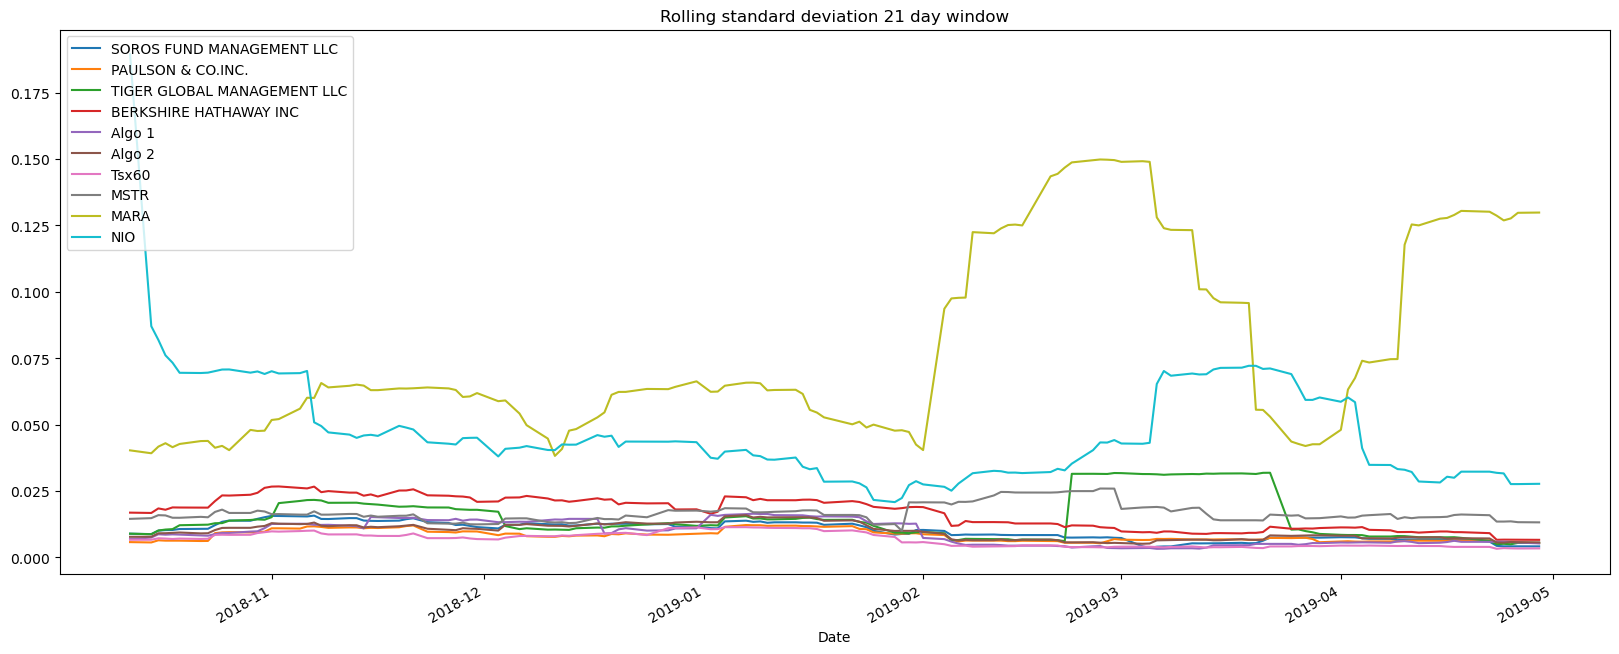

In [575]:
# Calculate rolling standard deviation

joined_portfolios.rolling(window=21).std().plot(title='Rolling standard deviation 21 day window', figsize=(20,8))

# Plot rolling standard deviation


### Calculate and plot the correlation

In [576]:
# Calculate and plot the correlation

joined_portfolios_correlation = joined_portfolios.corr()

joined_portfolios_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60,MSTR,MARA,NIO
SOROS FUND MANAGEMENT LLC,1.000000,0.801918,0.472339,0.837954,0.358411,0.871861,0.720956,0.531234,0.207811,0.232630
PAULSON & CO.INC.,0.801918,1.000000,0.464944,0.679481,0.410353,0.811178,0.617740,0.410589,0.232321,0.217712
TIGER GLOBAL MANAGEMENT LLC,0.472339,0.464944,1.000000,0.329468,0.147843,0.387951,0.400512,0.184221,0.004498,0.090811
BERKSHIRE HATHAWAY INC,0.837954,0.679481,0.329468,1.000000,0.371373,0.804006,0.687896,0.514140,0.247394,0.216839
Algo 1,0.358411,0.410353,0.147843,0.371373,1.000000,0.413939,0.324691,0.219127,0.144697,0.104577
Algo 2,0.871861,0.811178,0.387951,0.804006,0.413939,1.000000,0.762953,0.569286,0.300430,0.212974
Tsx60,0.720956,0.617740,0.400512,0.687896,0.324691,0.762953,1.000000,0.503653,0.233132,0.117685
MSTR,0.531234,0.410589,0.184221,0.514140,0.219127,0.569286,0.503653,1.000000,0.250848,0.002421
MARA,0.207811,0.232321,0.004498,0.247394,0.144697,0.300430,0.233132,0.250848,1.000000,0.057331
NIO,0.232630,0.217712,0.090811,0.216839,0.104577,0.212974,0.117685,0.002421,0.057331,1.000000


<AxesSubplot: >

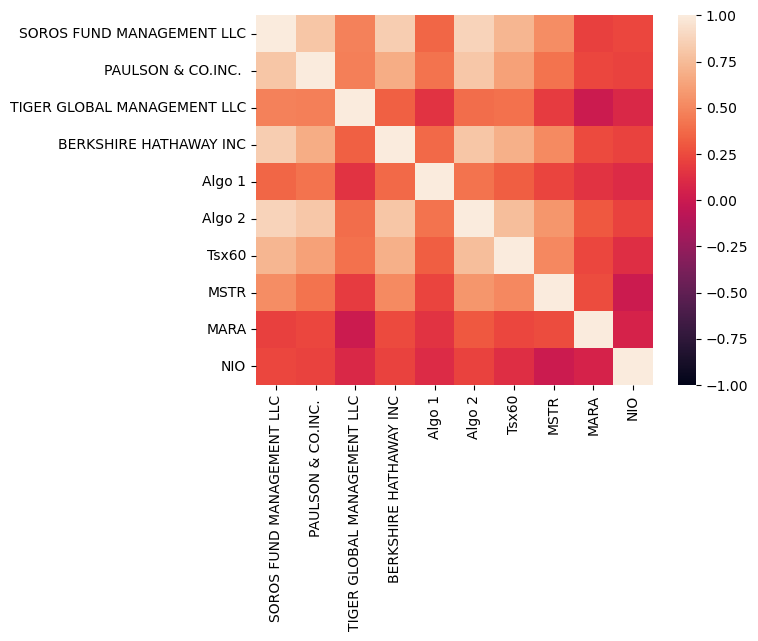

In [577]:
import seaborn as sns

sns.heatmap(joined_dataframes_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

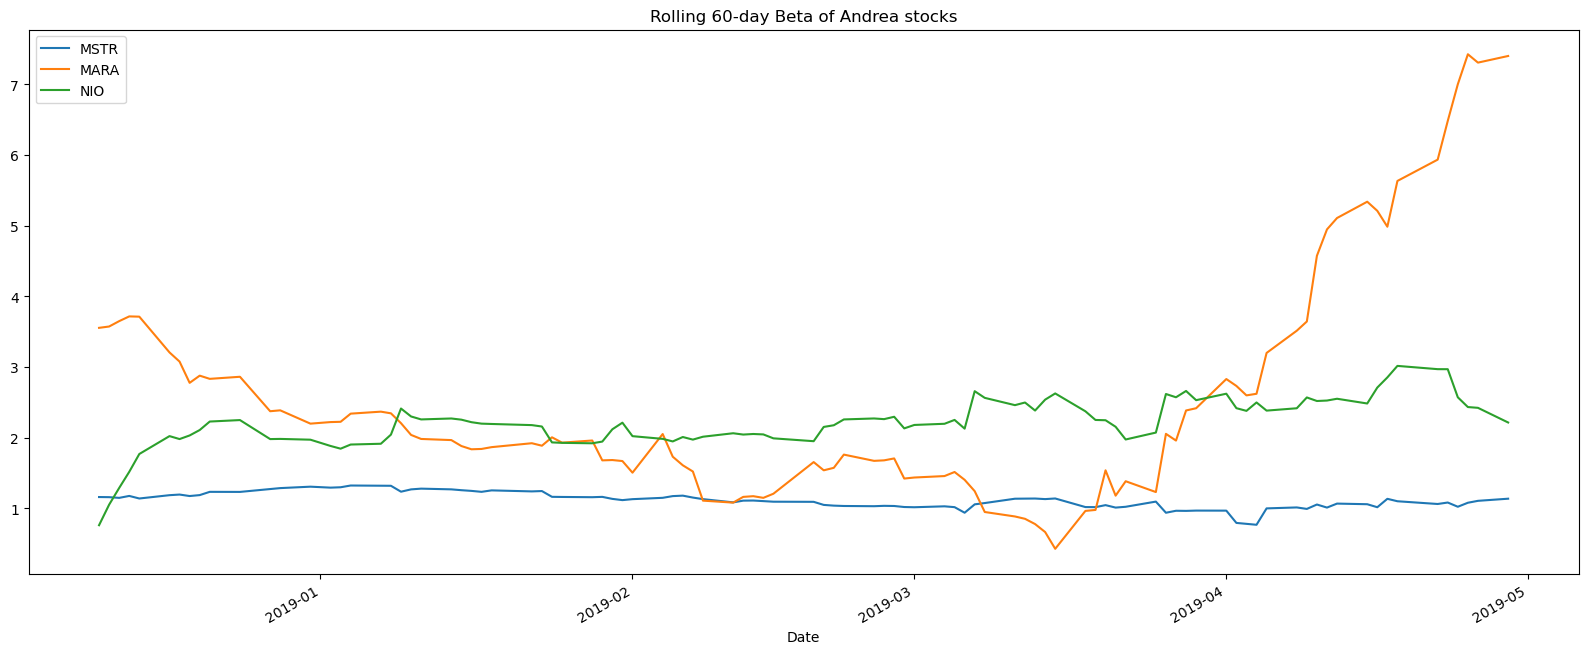

In [578]:
# Calculate and plot Beta

#rolling_beta = rolling_covariance / rolling_variance
#joined_dataframes = daily returns of my stocks and daily returns of stocks provided 


#Calculating covariance of my stocks and S&P 60 TSX

rolling_covariance_mstr = joined_portfolios['MSTR'].rolling(window=60).cov(joined_portfolios['Tsx60'])
rolling_covariance_mara = joined_portfolios['MARA'].rolling(window=60).cov(joined_portfolios['Tsx60'])
rolling_covariance_nio = joined_portfolios['NIO'].rolling(window=60).cov(joined_portfolios['Tsx60'])

#Calculating variance 

rolling_variance2 = joined_portfolios['Tsx60'].rolling(window=60).var()

#Calculating rolling beta 

rolling_mstr_beta = rolling_covariance_mstr / rolling_variance2
rolling_mara_beta = rolling_covariance_mara / rolling_variance2
rolling_nio_beta = rolling_covariance_nio / rolling_variance2


ax = rolling_mstr_beta.plot(figsize=(20, 8), title="Rolling 60-day Beta of Andrea stocks")
rolling_mara_beta.plot(ax=ax)
rolling_nio_beta.plot(ax=ax)

ax.legend(["MSTR", "MARA", "NIO"])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [608]:
# Calculate Annualized Sharpe Ratios
#joined_dataframes= daily returns of my portfolios and initial portolios provided 
#portfolios2_std= joined_dataframes.std() 

sharpe_ratios2 = (joined_portfolios.mean() * 252) / (joined_portfolios_std * np.sqrt(252))
sharpe_ratios2= sharpe_ratios2.sort_values()

sharpe_ratios2

TIGER GLOBAL MANAGEMENT LLC   -1.911215
PAULSON & CO.INC.             -0.630284
Algo 2                        -0.467012
MSTR                          -0.066931
SOROS FUND MANAGEMENT LLC      0.097549
NIO                            0.107589
MARA                           0.367455
Tsx60                          0.392608
BERKSHIRE HATHAWAY INC         0.425403
Algo 1                         2.544421
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios of combined portfolios'}>

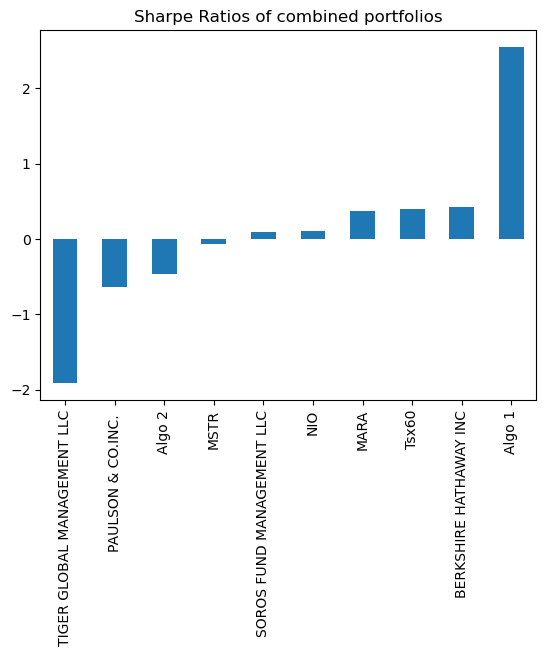

In [602]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title="Sharpe Ratios of combined portfolios")

In [610]:
#annual_combined_portfolios_std
annual_combined_portfolios_std

PAULSON & CO.INC.              0.110841
Tsx60                          0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

In [612]:
# sharpe_ratios
sharpe_ratios

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
Tsx60                          0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

In [613]:
#annual_andrea_portfolio_std
andrea_stocks_daily_returns_std = andrea_stocks_daily_returns.std()
annual_andrea_portfolio_std = andrea_stocks_daily_returns_std * np.sqrt(252)
annual_andrea_portfolio_std

MSTR    0.265399
MARA    1.352459
NIO     1.267999
dtype: float64

In [614]:
#andrea_sharpe_ratios 
andrea_sharpe_ratios = (andrea_stocks_daily_returns.mean() * 252) / (annual_andrea_portfolio_std)
andrea_sharpe_ratios

MSTR    0.146860
MARA    0.434341
NIO     0.156453
dtype: float64

In [615]:
portfolios_sharpe_avg = sharpe_ratios.mean()
portfolios_sharpe_avg

andrea_sharpe_avg = andrea_sharpe_ratios.mean()
andrea_sharpe_avg

# Display results
print("Portfolios's sharpe ratio average:", portfolios_sharpe_avg)
print("Andrea sharpe ratio average:", andrea_sharpe_avg)

Portfolios's sharpe ratio average: 0.30651230842900634
Andrea sharpe ratio average: 0.2458849643125702


In [620]:
portfolios_sharpe_avg > andrea_sharpe_avg

True

### How does your portfolio do?

Write your answer here!

In [648]:
analysis_comment ="""I wanted to calculate the sharpe ratio average of my portfolio, and also calculate the sharpe ratio average of the other portfolios.From the 
3 stocks that I picked, MARA performed the best having an annual sharpe ratio of 0.434341, which is the highest sharpest ratio 
out the 3 stocks. As well, MARA has the most volatility as its annual std is 1.352459, which is the highest from the 3 stocks that I chose
not but crazy far from NIO with an annual std of 1.267999. 

I have learned that while a higher sharpe ratio generally indicates better risk adjusted performance, it is not always the case that the 
investment with the highest sharpe ratio is the best investment, as it only takes into account the return and risk of the investment,
and does not consider other factors such diversification, or market conditions.

I did some research and I learned that an investment with a very high sharpe ratio may be highly volatile and only suitable for investors with
a high risk tolerance. On the other hand an investment with a lower sharpe ratio may provide steady returns and be better suited for investors with a 
lower risk tolerance.

I personally love MSTR stock, it is now a derivative of bitcoin. Its cash flow is backed up by bitcoin assets, and therefore it makes it an awesome
stock. The CEO Michael Saylor has created a website hope.com to teach students around the world about finance, and earn credits towards a university
career. I mention this, because integrity of the CEO's of public traded companies have an indirect impact to the performance of the stocks. It isn't
maybe what we want to hear, but people with emotions place trades out of fear, out of greed, and the news, social media and the like have demostrated 
to play a huge role in how the market responds to financial assets. 

I also have to say that my stocks have performed way better, and seen increments in the last 2 years. The date data I have used to compare my stocks
with the stocks provided in this exercise needed. Therefore, the actual gains and greater performance that my stocks have showned in the last few years
isn't reflected in the analysis. 

Having said this, I will continue to accumulate. Fun exercise! THANK YOU.\
"""

print(analysis_comment.rstrip())


I wanted to calculate the sharpe ratio average of my portfolio, and also calculate the sharpe ratio average of the other portfolios.From the 
3 stocks that I picked, MARA performed the best having an annual sharpe ratio of 0.434341, which is the highest sharpest ratio 
out the 3 stocks. As well, MARA has the most volatility as its annual std is 1.352459, which is the highest from the 3 stocks that I chose
not but crazy far from NIO with an annual std of 1.267999. 

I have learned that while a higher sharpe ratio generally indicates better risk adjusted performance, it is not always the case that the 
investment with the highest sharpe ratio is the best investment, as it only takes into account the return and risk of the investment,
and does not consider other factors such diversification, or market conditions.

I did some research and I learned that an investment with a very high sharpe ratio may be highly volatile and only suitable for investors with
a high risk tolerance. On the othe